In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Synthetic Data Generation

In [8]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
#ker3=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
ker_all=combine(ker1,ker2)

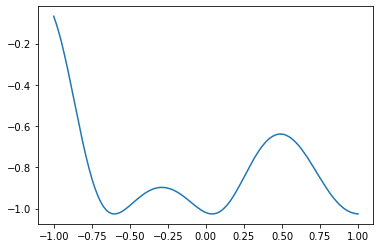

In [6]:
n=200
N=1
data=np.linspace(-1,1,n)[:,None]
syn=path(data,ker_all)
samp=syn.generate(N)
p=plt.plot(data,samp) 

Prediction

In [7]:
in_dat=data[::2]
out_dat=samp[::2]

In [10]:
m=dgp(in_dat,out_dat,ker_all)

In [11]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=500, burnin=0,method='mean_var')

se = 0.05287683547896279


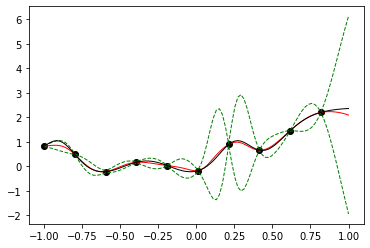

In [12]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(data,samp,color='black',lw=1)
plt.scatter(data[::10],samp[::10],color='black')

Training the hyperparameters

In [14]:
m.train(N=400,sub_burn=10,method='L-BFGS-B')

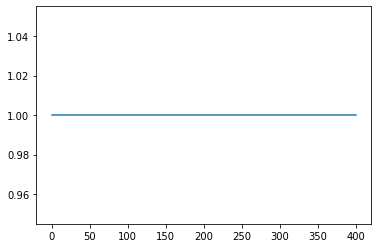

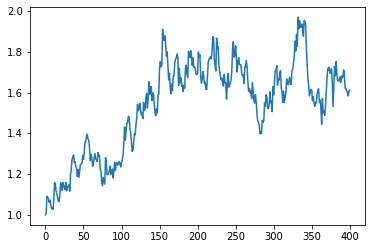

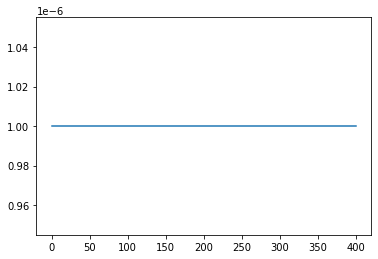

In [16]:
m.plot(1)

In [17]:
m.update_final_kernel(300)

In [18]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, burnin=0,method='mean_var')

se = 5.933927098077364e-05


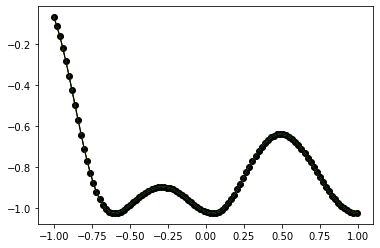

In [19]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(data,samp,color='black',lw=1)
plt.scatter(data[::2],samp[::2],color='black')

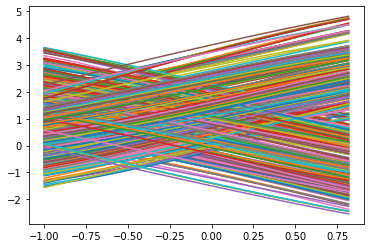

In [11]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[0][i],m.samples[1][i])

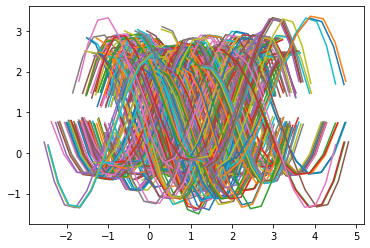

In [12]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[1][i],m.samples[2][i])

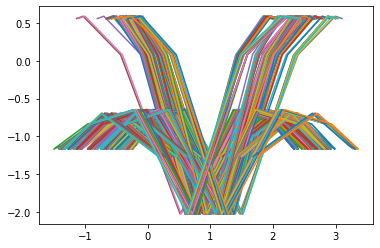

In [13]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[2][i],m.samples[3][i])